# Imbd Dataset analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('../data/data.csv')
df.head(5)

,Movie Name,IMDb Rating,Popularity,Release Date,Box Office,Runtime,Genre,Director,Cast,Production Company,Country,Language
0,The Kerala Story Bangla,6.5,NaN,NaN,NaN,12 minutes,"['Short', 'Drama']",['Satyajit Das'],[],[],NaN,['Bengali']
1,Generation Z,NaN,NaN,NaN,NaN,NaN,"['Horror', 'Comedy']",[],"['Chris Reilly', 'Ellora Torchia', 'Viola Pret...","['All3Media International', 'The Forge', 'Zwei...",NaN,[]
2,Criminal Justice: Adhura Sach,7.7,NaN,"August 26, 2022 (India)",NaN,45 minutes,"['Crime', 'Drama', 'Mystery']",[],"['Pankaj Tripathi', 'Swastika Mukherjee', 'Pur...","['Applause Entertainment Ltd.', 'BBC Studios']",India,['Hindi']
3,Madhil Mel Kaadhal,NaN,NaN,NaN,NaN,NaN,['Romance'],['Anjana Ali Khan'],"['Mugen Rao', 'Divya Bharathi', 'Sakshi Agarwal']",[],NaN,['Tamil']
4,Saawariya,5.2,NaN,"November 9, 2007 (India)","$18,525,631",2 hours 22 minutes,"['Drama', 'Musical', 'Romance']",['Sanjay Leela Bhansali'],"['Ranbir Kapoor', 'Sonam Kapoor', 'Salman Khan']","['SPE Films', 'SLB Films Pvt. Ltd.']",NaN,['Hindi']


In [4]:
print("Number of rows and columns in the data set: ", df.shape)

Number of rows and columns in the data set:  (10004, 12)


In [5]:
for col in df.columns:
    print(f'Type of {col} is {df[col].dtype}')

Type of Movie Name is object
Type of IMDb Rating is float64
Type of Popularity is object
Type of Release Date is object
Type of Box Office is object
Type of Runtime is object
Type of Genre is object
Type of Director is object
Type of Cast is object
Type of Production Company is object
Type of Country is object
Type of Language is object


In [6]:
for col in df.columns:
    if(col in ['Genre', 'Director', 'Cast', 'Production Company', 'Language']):
        print(f"Empty values in {col} is {df[col].apply(lambda x: x=='[]').sum()} ({df[col].apply(lambda x: x=='[]').sum()/df.shape[0]*100:.2f}%)")
    else: 
        print(f'NaN values in {col} is {df[col].isna().sum()} ({df[col].isna().sum()/df.shape[0]*100:.2f}%)')

NaN values in Movie Name is 84 (0.84%)
NaN values in IMDb Rating is 1333 (13.32%)
NaN values in Popularity is 9817 (98.13%)
NaN values in Release Date is 3755 (37.53%)
NaN values in Box Office is 7434 (74.31%)
NaN values in Runtime is 2305 (23.04%)
Empty values in Genre is 337 (3.37%)
Empty values in Director is 2287 (22.86%)
Empty values in Cast is 818 (8.18%)
Empty values in Production Company is 6581 (65.78%)
NaN values in Country is 4006 (40.04%)
Empty values in Language is 284 (2.84%)


## Analyzing the IMDb Rating Column

/Users/adittyagupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


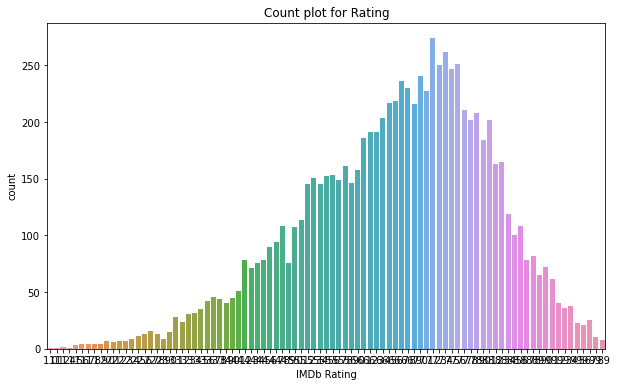

In [14]:
# Plot a count plot for the 'Rating' column
plt.figure(figsize=(10, 6))
sns.countplot(df['IMDb Rating'])
plt.title('Count plot for Rating')
plt.show()


### Looking at dependecy of IMDb Rating on other columns

In [37]:
mydf = df[df['Box Office'].isna() == False]
mydf['Box Office'] = mydf['Box Office'].apply(lambda x: x.replace('$', '').replace(',', '').replace('₹', '')).astype(int)
mydf['Box Office'] = mydf['Box Office'].apply(lambda x: x/1000000)

/var/folders/5s/zldrbqj16q3dpgsj9srt4f2c0000gn/T/ipykernel_12906/2693158907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['Box Office'] = mydf['Box Office'].apply(lambda x: x.replace('$', '').replace(',', '').replace('₹', '')).astype(int)
/var/folders/5s/zldrbqj16q3dpgsj9srt4f2c0000gn/T/ipykernel_12906/2693158907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['Box Office'] = mydf['Box Office'].apply(lambda x: x/1000000)


In [41]:
#Check for correlation between Box Office and IMDb Rating
print(mydf[['Box Office', 'IMDb Rating']].corr())
#Very low correlation

             Box Office  IMDb Rating
Box Office     1.000000    -0.051241
IMDb Rating   -0.051241     1.000000


### Analysis of the Release Date Column

In [47]:
mydf = df[df['Release Date'].isna() == False]
print(mydf['Release Date'].head(5))

2     August 26, 2022 (India)
4    November 9, 2007 (India)
5    February 9, 2024 (India)
6        July 8, 1983 (India)
7     October 8, 2004 (India)
Name: Release Date, dtype: object


In [46]:
#Checking for all the countries release date we have
print(mydf['Release Date'].apply(lambda x: x.split('(')[1].split(')')[0]).unique())

['India' 'Australia' 'South Africa' 'United States' 'Germany' 'Kuwait'
 'Canada' 'Sweden' 'Italy' 'Brazil' 'United Arab Emirates' 'Singapore'
 'Netherlands' 'United Kingdom' 'Denmark' 'Thailand' 'Kazakhstan'
 'Ireland' 'France' 'Ukraine' 'Greece' 'China' 'Vietnam' 'Norway'
 'Pakistan' 'Belgium' 'Russia' 'Philippines' 'Portugal' 'Israel'
 'Switzerland' 'South Korea' 'Poland' 'Bahamas' 'Spain' 'Serbia' 'Mexico'
 'Georgia' 'Egypt' 'Turkey' 'Malaysia' 'Argentina' 'Indonesia']


In [61]:
years = mydf['Release Date'].apply(lambda x: x.split('(')[0]).apply(lambda x: x.split()[-1] if len(x.split(','))==1 else x.split(',')[1])
print(years)

2         2022 
4         2007 
5         2024 
6         1983 
7         2004 
          ...  
9996      2023 
9998      2020 
10000     2007 
10001     2015 
10002     2003 
Name: Release Date, Length: 6249, dtype: object


/Users/adittyagupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


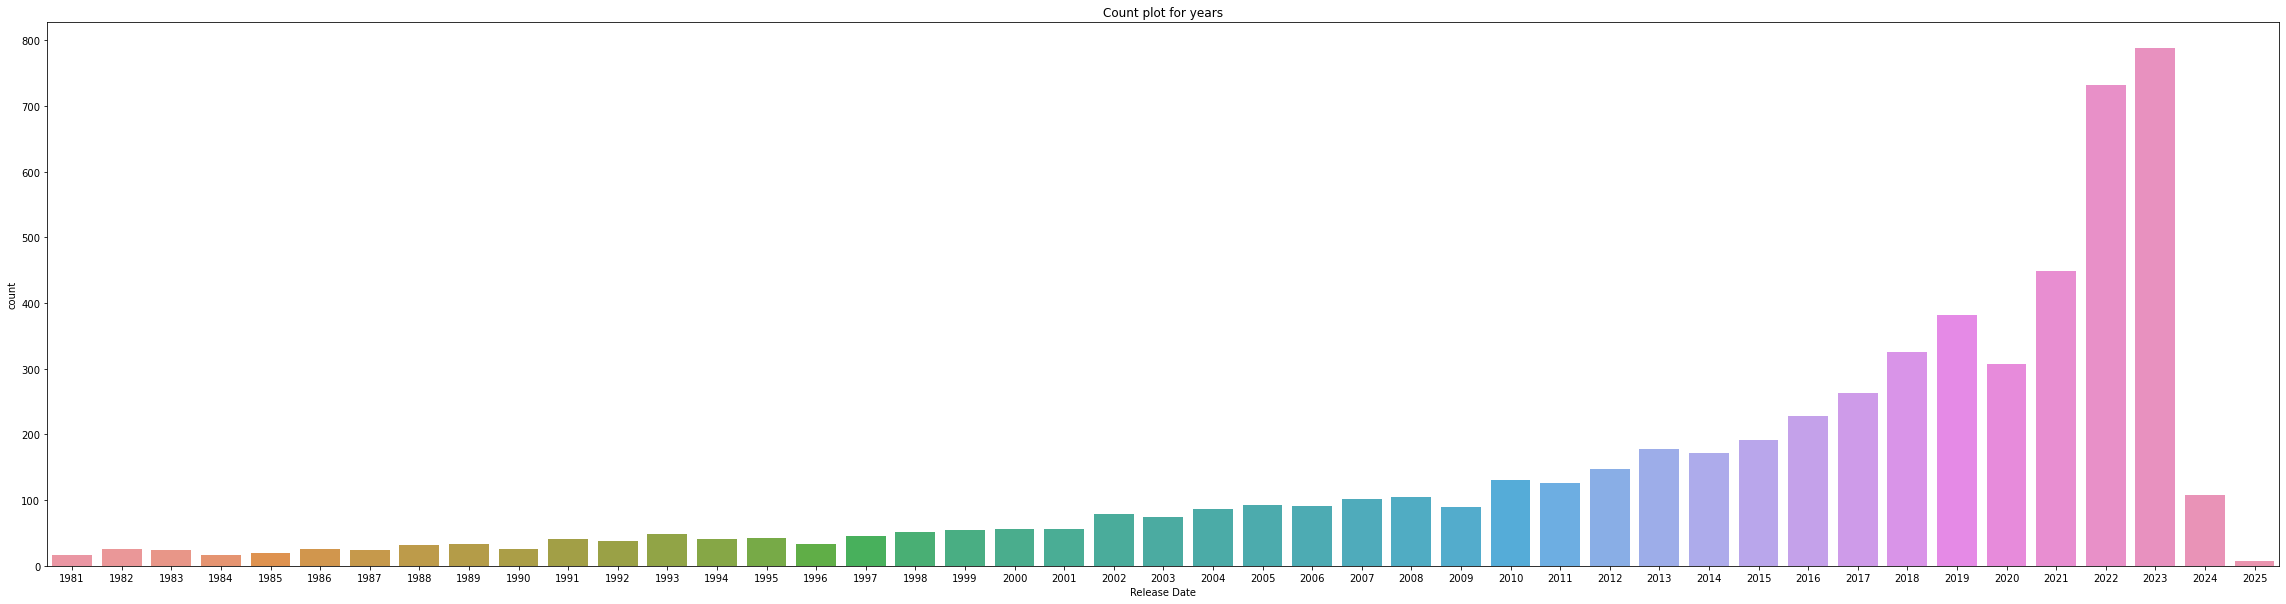

In [62]:
years  = years.apply(lambda x: int(x))
years = years[years > 1980]
plt.figure(figsize=(40, 20))
sns.countplot(years)
plt.title('Count plot for years')
plt.show()